# Importaciones

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import StandardScaler

# Carga de datos

In [2]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_df = pd.read_csv('data/sample_submission.csv')

# Primeras exploraciones

In [3]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [4]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [5]:
test_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [8]:
train_df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


In [9]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


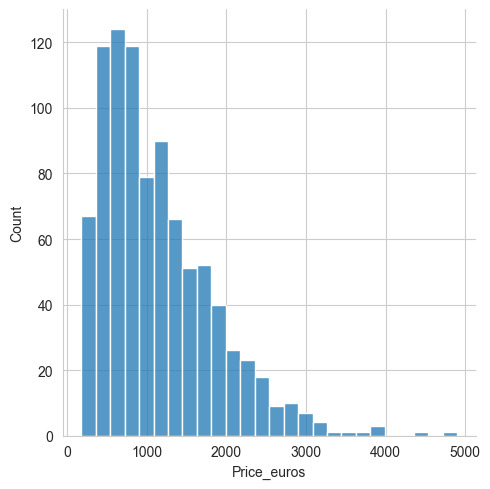

In [10]:
sns.displot(train_df['Price_euros']);

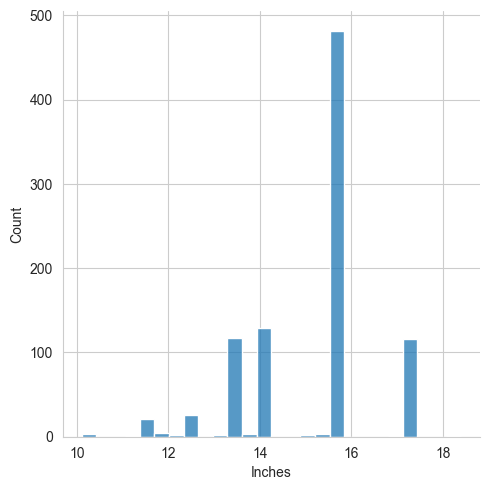

In [11]:
sns.displot(train_df['Inches']);

In [12]:
train_df[['Price_euros', 'Inches']].corr()

,Price_euros,Inches
Price_euros,1.000000,0.070152
Inches,0.070152,1.000000


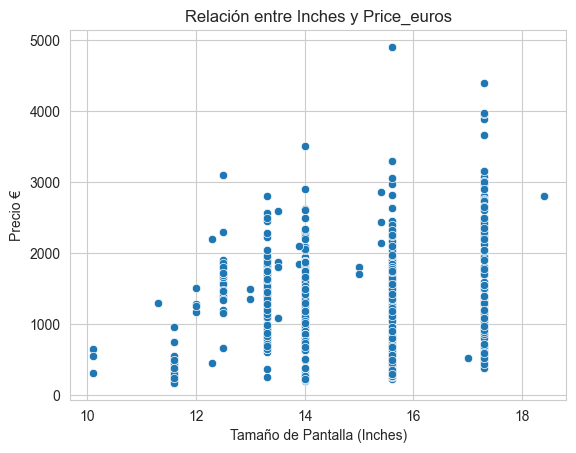

In [13]:
sns.scatterplot(data=train_df, x='Inches', y='Price_euros')
plt.title("Relación entre Inches y Price_euros")
plt.xlabel("Tamaño de Pantalla (Inches)")
plt.ylabel("Precio €")
plt.show()

# Limpieza de datos

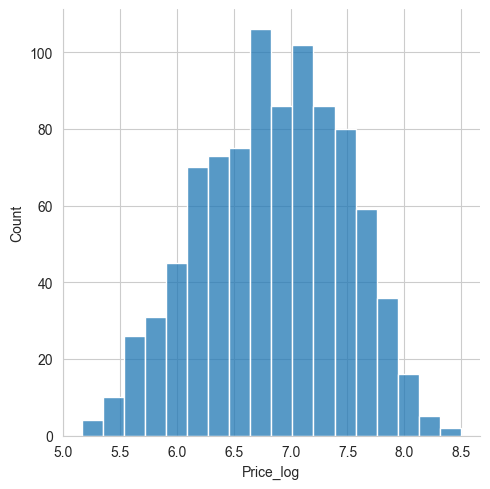

In [14]:
# Aplicar la transformación logarítmica
train_df['Price_log'] = np.log1p(train_df['Price_euros'])
sns.displot(train_df['Price_log']);

In [15]:
train_df[['Price_log', 'Inches']].corr()

,Price_log,Inches
Price_log,1.000000,0.054788
Inches,0.054788,1.000000


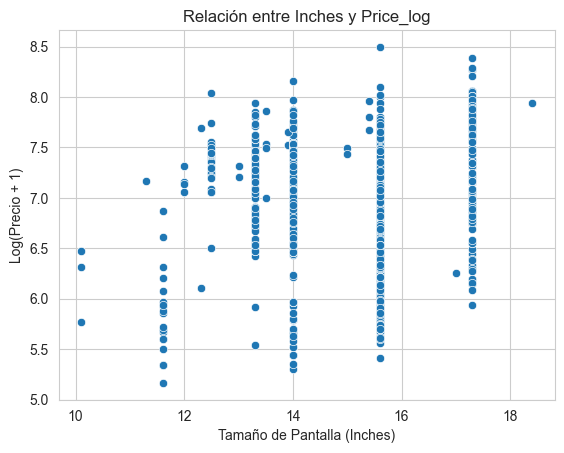

In [16]:
sns.scatterplot(data=train_df, x='Inches', y='Price_log')
plt.title("Relación entre Inches y Price_log")
plt.xlabel("Tamaño de Pantalla (Inches)")
plt.ylabel("Log(Precio + 1)")
plt.show()

In [17]:
train_df['Company'].unique()

array(['Asus', 'Lenovo', 'Dell', 'Mediacom', 'Toshiba', 'HP', 'Acer',
       'Apple', 'MSI', 'Fujitsu', 'Samsung', 'Chuwi', 'Microsoft',
       'Razer', 'Xiaomi', 'Huawei', 'Google', 'Vero', 'LG'], dtype=object)

In [18]:
train_df['Company'].value_counts()

Company
Dell         218
HP           197
Lenovo       193
Asus         110
Acer          76
Toshiba       37
MSI           36
Apple         17
Mediacom       6
Samsung        5
Microsoft      4
Razer          4
Xiaomi         2
Huawei         2
Fujitsu        1
Chuwi          1
Google         1
Vero           1
LG             1
Name: count, dtype: int64

In [19]:
# Cambiar temporalmente el límite de filas mostradas
with pd.option_context('display.max_rows', None):
    print(train_df['Product'].value_counts())

Product
Inspiron 3567                                    24
XPS 13                                           21
Vostro 3568                                      15
250 G6                                           13
Legion Y520-15IKBN                               12
Inspiron 5570                                    12
Alienware 17                                     11
Inspiron 5567                                    11
Inspiron 7567                                    10
Satellite Pro                                    10
Latitude 5580                                    10
ProBook 450                                      10
Aspire 3                                          9
MacBook Pro                                       9
EliteBook 840                                     9
Vostro 5568                                       8
ProBook 650                                       6
ThinkPad X1                                       6
ThinkPad Yoga                                     6
Elit

In [20]:
train_df['TypeName'].value_counts()

TypeName
Notebook              516
Gaming                143
Ultrabook             130
2 in 1 Convertible     84
Workstation            22
Netbook                17
Name: count, dtype: int64

In [21]:
train_df['OpSys'].value_counts()

OpSys
Windows 10      745
No OS            46
Linux            46
Windows 7        33
Chrome OS        18
macOS            11
Mac OS X          6
Windows 10 S      5
Android           2
Name: count, dtype: int64

In [22]:
columns_to_drop = ['laptop_ID', 'Company', 'Product', 'OpSys', 'Price_euros']
train_df = train_df.drop(columns=columns_to_drop)

In [23]:
train_df.head()

,id,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_log
0,697,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,1.2kg,6.507278
1,435,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,3.2kg,7.436028
2,735,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,1.85kg,6.659294
3,864,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,1.29kg,7.714677
4,1176,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,2.32kg,6.716595


In [24]:
# Aplicar One-Hot Encoding a TypeName
train_df = pd.get_dummies(train_df, columns=['TypeName'], drop_first=True)


# Extraer ancho y alto de la resolución
train_df[['res_width', 'res_height']] = train_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Crear una columna binaria para Touchscreen antes de eliminar ScreenResolution
train_df['Touchscreen'] = train_df['ScreenResolution'].str.contains('Touchscreen', case=False, na=False).astype(int)

# Crear una nueva columna con el total de píxeles (ancho x alto)
train_df['Resolution'] = train_df['res_width'] * train_df['res_height']

# Eliminar columnas innecesarias
train_df = train_df.drop(columns=['res_width', 'res_height', 'ScreenResolution'])



# Extraer la marca del CPU (ej.: Intel, AMD)
train_df['Cpu_Brand'] = train_df['Cpu'].str.split().str[0]

# Crear categorías basadas en la familia del procesador (ej.: Core i7, Ryzen 5)
train_df['Cpu_Family'] = train_df['Cpu'].str.extract(r'(Core i\d|Ryzen \d|Celeron|Pentium)')
train_df = train_df.drop(columns=['Cpu'])  # Eliminar la columna original

# Convertir Cpu_Brand y Cpu_Family a One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['Cpu_Brand', 'Cpu_Family'], drop_first=True)


# Eliminar la unidad 'GB' y convertir a entero
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)

# Crear columnas binarias para SSD y HDD
train_df['Memory_SSD'] = train_df['Memory'].str.contains('SSD', na=False).astype(int)
train_df['Memory_HDD'] = train_df['Memory'].str.contains('HDD', na=False).astype(int)

# Extraer la capacidad principal
def parse_memory_capacity(memory):
    import re
    if isinstance(memory, str):
        # Buscar valores numéricos asociados a TB o GB
        tb_match = re.search(r'(\d+\.?\d*)TB', memory)  # Buscar valores en TB
        gb_match = re.search(r'(\d+\.?\d*)GB', memory)  # Buscar valores en GB
        
        tb_capacity = float(tb_match.group(1)) * 1024 if tb_match else 0  # Convertir TB a GB
        gb_capacity = float(gb_match.group(1)) if gb_match else 0  # Mantener GB
        
        # Sumar ambas capacidades
        return tb_capacity + gb_capacity
    return 0


train_df['Memory_Capacity'] = train_df['Memory'].apply(parse_memory_capacity)
train_df = train_df.drop(columns=['Memory'])  # Eliminar la columna original


# Extraer la marca de la GPU
train_df['Gpu_Brand'] = train_df['Gpu'].str.split().str[0]

# Extraer la familia de la GPU
def extract_gpu_family(gpu):
    if 'GTX' in gpu or 'RTX' in gpu:
        return 'GTX/RTX'
    elif 'Radeon' in gpu:
        return 'Radeon'
    elif 'HD Graphics' in gpu:
        return 'HD Graphics'
    elif 'Iris' in gpu:
        return 'Iris'
    else:
        return 'Other'

train_df['Gpu_Family'] = train_df['Gpu'].apply(extract_gpu_family)

# Extraer el modelo de la GPU
def extract_gpu_model(gpu):
    import re
    match = re.search(r'\d+', gpu)
    return match.group(0) if match else 'Unknown'

train_df['Gpu_Model'] = train_df['Gpu'].apply(extract_gpu_model)

# Convertir Gpu_Brand y Gpu_Family a variables categóricas
train_df = pd.get_dummies(train_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)

# Opcionalmente eliminar la columna original
train_df = train_df.drop(columns=['Gpu'])


# Eliminar la unidad 'kg' y convertir a float
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      912 non-null    int64  
 1   Inches                  912 non-null    float64
 2   Ram                     912 non-null    int64  
 3   Weight                  912 non-null    float64
 4   Price_log               912 non-null    float64
 5   TypeName_Gaming         912 non-null    bool   
 6   TypeName_Netbook        912 non-null    bool   
 7   TypeName_Notebook       912 non-null    bool   
 8   TypeName_Ultrabook      912 non-null    bool   
 9   TypeName_Workstation    912 non-null    bool   
 10  Touchscreen             912 non-null    int64  
 11  Resolution              912 non-null    float64
 12  Cpu_Brand_Intel         912 non-null    bool   
 13  Cpu_Family_Core i3      912 non-null    bool   
 14  Cpu_Family_Core i5      912 non-null    bo

In [26]:
train_df.head()

,id,Inches,Ram,Weight,Price_log,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,...,Memory_SSD,Memory_HDD,Memory_Capacity,Gpu_Model,Gpu_Brand_Intel,Gpu_Brand_Nvidia,Gpu_Family_HD Graphics,Gpu_Family_Iris,Gpu_Family_Other,Gpu_Family_Radeon
0,697,12.5,4,1.20,6.507278,False,False,False,False,False,...,0,0,64.0,515,True,False,True,False,False,False
1,435,17.3,8,3.20,7.436028,True,False,False,False,False,...,1,1,1280.0,580,False,False,False,False,False,True
2,735,15.6,4,1.85,6.659294,False,False,True,False,False,...,0,1,1024.0,620,True,False,True,False,False,False
3,864,13.3,16,1.29,7.714677,False,False,False,True,False,...,1,0,512.0,640,True,False,False,True,False,False
4,1176,15.6,4,2.32,6.716595,False,False,True,False,False,...,0,0,1024.0,520,True,False,True,False,False,False


In [27]:
train_df['Gpu_Model'].value_counts()

Gpu_Model
620        244
520        147
1050        68
5           47
1060        40
940         39
500         29
530         27
400         25
1070        24
930         20
920         18
Unknown     17
7           16
150         12
515         11
960          9
615          9
640          8
980          8
950          7
2            7
505          7
540          5
405          5
4            5
2200         5
1200         5
130          4
580          4
6000         4
1080         4
1000         4
510          3
970          3
550          3
4190         3
630          3
650          2
965          2
3000         2
17           1
5300         1
3            1
6150         1
2000         1
555          1
560          1
Name: count, dtype: int64

In [28]:
train_df = train_df.drop(columns=['Gpu_Model'])

In [29]:
# Seleccionar columnas numéricas para escalar
numerical_cols = ['Inches', 'Resolution', 'Weight', 'Memory_Capacity', 'Ram']

# Crear el escalador y aplicarlo
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Verificar los resultados
print(train_df[numerical_cols].describe())


             Inches    Resolution        Weight  Memory_Capacity           Ram
count  9.120000e+02  9.120000e+02  9.120000e+02     9.120000e+02  9.120000e+02
mean   2.031513e-15  1.616641e-16 -1.850372e-16     7.791039e-17  1.129701e-16
std    1.000549e+00  1.000549e+00  1.000549e+00     1.000549e+00  1.000549e+00
min   -3.514300e+00 -7.999943e-01 -2.068842e+00    -1.289825e+00 -1.245134e+00
25%   -7.514553e-01 -5.178200e-01 -7.527346e-01    -7.741250e-01 -8.534260e-01
50%    3.820196e-01 -6.046491e-02  9.621779e-03    -2.667425e-01 -7.000928e-02
75%    3.820196e-01 -6.046491e-02  3.889035e-01     8.228824e-01 -7.000928e-02
max    2.365601e+00  4.429931e+00  4.014837e+00     4.016897e+00  1.089783e+01


In [30]:
# Aplicar One-Hot Encoding a TypeName
test_df = pd.get_dummies(test_df, columns=['TypeName'], drop_first=True)

# Asegurarse de que las columnas de One-Hot Encoding sean consistentes con train_df
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Agregar columnas faltantes con valores 0

# Extraer ancho y alto de la resolución
test_df[['res_width', 'res_height']] = test_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Crear una columna binaria para Touchscreen antes de eliminar ScreenResolution
test_df['Touchscreen'] = test_df['ScreenResolution'].str.contains('Touchscreen', case=False, na=False).astype(int)

# Crear una nueva columna con el total de píxeles (ancho x alto)
test_df['Resolution'] = test_df['res_width'] * test_df['res_height']

# Eliminar columnas innecesarias
test_df = test_df.drop(columns=['res_width', 'res_height', 'ScreenResolution'])

# Extraer la marca del CPU (ej.: Intel, AMD)
test_df['Cpu_Brand'] = test_df['Cpu'].str.split().str[0]

# Crear categorías basadas en la familia del procesador (ej.: Core i7, Ryzen 5)
test_df['Cpu_Family'] = test_df['Cpu'].str.extract(r'(Core i\d|Ryzen \d|Celeron|Pentium)')
test_df = test_df.drop(columns=['Cpu'])  # Eliminar la columna original

# Convertir Cpu_Brand y Cpu_Family a One-Hot Encoding
test_df = pd.get_dummies(test_df, columns=['Cpu_Brand', 'Cpu_Family'], drop_first=True)

# Asegurarse de que las columnas de One-Hot Encoding sean consistentes con train_df
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Agregar columnas faltantes con valores 0

# Eliminar la unidad 'GB' y convertir a entero
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)

# Crear columnas binarias para SSD y HDD
test_df['Memory_SSD'] = test_df['Memory'].str.contains('SSD', na=False).astype(int)
test_df['Memory_HDD'] = test_df['Memory'].str.contains('HDD', na=False).astype(int)

# Extraer la capacidad principal
test_df['Memory_Capacity'] = test_df['Memory'].apply(parse_memory_capacity)
test_df = test_df.drop(columns=['Memory'])  # Eliminar la columna original

# Extraer la marca de la GPU
test_df['Gpu_Brand'] = test_df['Gpu'].str.split().str[0]

# Extraer la familia de la GPU
test_df['Gpu_Family'] = test_df['Gpu'].apply(extract_gpu_family)

# Extraer el modelo de la GPU
test_df['Gpu_Model'] = test_df['Gpu'].apply(extract_gpu_model)

# Convertir Gpu_Brand y Gpu_Family a variables categóricas
test_df = pd.get_dummies(test_df, columns=['Gpu_Brand', 'Gpu_Family'], drop_first=True)

# Asegurarse de que las columnas de One-Hot Encoding sean consistentes con train_df
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Agregar columnas faltantes con valores 0

# Opcionalmente eliminar la columna original
test_df = test_df.drop(columns=['Gpu'])

# Eliminar la unidad 'kg' y convertir a float
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

# Reordenar las columnas para que coincidan con train_df
test_df = test_df[train_df.columns]



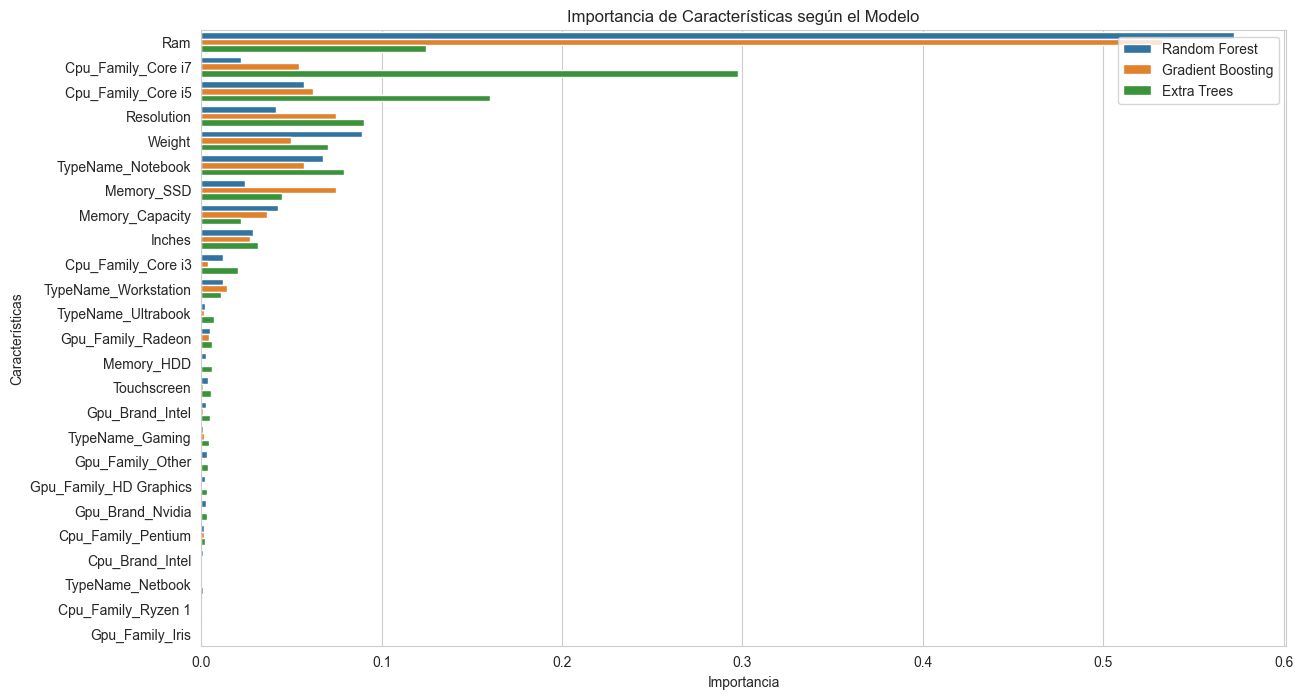

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que los datos están preparados correctamente
X_train = train_df.drop(columns=['Price_log', 'id'])  # Asegúrate de que 'Price_log' es la variable objetivo
y_train = train_df['Price_log']

X_test = test_df[X_train.columns]  # Usar las mismas columnas que en el conjunto de entrenamiento

# Modelos a evaluar
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42)
}

# Crear un DataFrame para almacenar las importancias de características
feature_importances = pd.DataFrame()

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Obtener las importancias de las características
    importances = model.feature_importances_
    
    # Crear un DataFrame para esta iteración
    temp_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances,
        'Model': name
    })
    
    # Concatenar con el DataFrame principal
    feature_importances = pd.concat([feature_importances, temp_df], axis=0)

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualización de importancias por modelo
plt.figure(figsize=(14, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', hue='Model', orient='h')
plt.title("Importancia de Características según el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.legend(loc="upper right")
plt.show()



In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import pandas as pd

# Inicializar modelos
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(random_state=42, n_estimators=100)
}

# Crear un DataFrame para almacenar las importancias
feature_importances = pd.DataFrame()

# Entrenar cada modelo y calcular las importancias
for name, model in models.items():
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    feature_importances[name] = importances

# Añadir los nombres de las características al DataFrame
feature_importances['Feature'] = X_train.columns

# Reorganizar columnas para que las características estén al principio
feature_importances = feature_importances[['Feature'] + list(models.keys())]

# Ordenar las características por la importancia promedio (opcional)
feature_importances['Average Importance'] = feature_importances.iloc[:, 1:].mean(axis=1)
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Mostrar la tabla ordenada
print("Importancia de características por modelos:")
print(feature_importances)



Importancia de características por modelos:
                   Feature  Random Forest  Gradient Boosting  Extra Trees  \
1                      Ram       0.572714           0.532450     0.124757   
13      Cpu_Family_Core i7       0.022316           0.054174     0.297471   
12      Cpu_Family_Core i5       0.056824           0.061916     0.160093   
2                   Weight       0.089299           0.050049     0.070289   
9               Resolution       0.041505           0.074816     0.090147   
5        TypeName_Notebook       0.067744           0.057273     0.078949   
16              Memory_SSD       0.024541           0.074511     0.044947   
18         Memory_Capacity       0.042665           0.036286     0.022161   
0                   Inches       0.028614           0.026801     0.031672   
7     TypeName_Workstation       0.012216           0.014267     0.010862   
11      Cpu_Family_Core i3       0.011873           0.003908     0.020211   
24       Gpu_Family_Radeon      

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      912 non-null    int64  
 1   Inches                  912 non-null    float64
 2   Ram                     912 non-null    float64
 3   Weight                  912 non-null    float64
 4   Price_log               912 non-null    float64
 5   TypeName_Gaming         912 non-null    bool   
 6   TypeName_Netbook        912 non-null    bool   
 7   TypeName_Notebook       912 non-null    bool   
 8   TypeName_Ultrabook      912 non-null    bool   
 9   TypeName_Workstation    912 non-null    bool   
 10  Touchscreen             912 non-null    int64  
 11  Resolution              912 non-null    float64
 12  Cpu_Brand_Intel         912 non-null    bool   
 13  Cpu_Family_Core i3      912 non-null    bool   
 14  Cpu_Family_Core i5      912 non-null    bo

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Seleccionar las características y la variable objetivo
selected_features = [col for col in train_df.columns if col not in ['Price_log', 'id']]
X = train_df[selected_features]
y = train_df['Price_log']

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos a entrenar
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='linear'),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Entrenar y evaluar los modelos
model_results = []
for name, model in models.items():
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mean_cv_score = -cv_scores.mean()
    
    # Entrenar y evaluar en conjunto de validación
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    val_mae = mean_absolute_error(y_val, y_pred)
    
    # Guardar resultados
    model_results.append({
        "Model": name,
        "CV MAE": mean_cv_score,
        "Validation MAE": val_mae
    })

# Mostrar los resultados
import pandas as pd
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by="Validation MAE")
print(results_df)


                    Model    CV MAE  Validation MAE
3                 XGBoost  0.190205        0.179669
1           Random Forest  0.191965        0.191620
2  Support Vector Machine  0.225948        0.248195
0       Linear Regression  0.228421        0.249326


In [35]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Seleccionar las características y la variable objetivo
selected_features = ['Ram', 'Memory_SSD', 'Resolution', 'Memory_Capacity', 
                     'Inches', 'Weight', 'Touchscreen', 'Memory_HDD']
X = train_df[selected_features]
y = train_df['Price_log']

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y sus espacios de hiperparámetros
param_grids = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "Support Vector Machine": {
        "model": SVR(),
        "params": {
            "kernel": ["linear", "rbf"],
            "C": [1, 10],
            "gamma": ["scale", "auto"]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 150],
            "max_depth": [6, 8],
            "learning_rate": [0.01, 0.05],
            "subsample": [0.8],
            "colsample_bytree": [0.8]
        }
    }
}

# Entrenar y optimizar los modelos
for name, config in param_grids.items():
    print(f"Optimizing {name}...")
    
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,  # Reducido a 2 folds para mayor velocidad
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        verbose=1
    )
    
    # Realizar la búsqueda de hiperparámetros
    grid_search.fit(X_train, y_train)
    
    # Obtener el mejor modelo y parámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Mejores parámetros encontrados para {name}: {best_params}")
    
    # Evaluar en el conjunto de validación
    y_pred = best_model.predict(X_val)
    val_mae = mean_absolute_error(y_val, y_pred)
    print(f"MAE del modelo optimizado ({name}): {val_mae:.2f}\n")


Optimizing Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros encontrados para Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
MAE del modelo optimizado (Random Forest): 0.21

Optimizing Support Vector Machine...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros encontrados para Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
MAE del modelo optimizado (Support Vector Machine): 0.25

Optimizing XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores parámetros encontrados para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}
MAE del modelo optimizado (XGBoost): 0.21



In [36]:
# Asumiendo que test_df contiene las mismas columnas seleccionadas para X
X_test = test_df[selected_features]

# Usar el mejor modelo (puedes cambiar esto por el nombre del modelo que prefieras)
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
test_predictions_log = best_model.predict(X_test)

# Invertir la transformación logarítmica para recuperar los valores originales
test_predictions = np.expm1(test_predictions_log)

# Crear un DataFrame con las predicciones
output_df = pd.DataFrame({
    "id": test_df["id"],  # Asegúrate de que 'id' esté presente en test_df
    "Price_euros": test_predictions
})

# Guardar el archivo CSV para la competición
output_file = "laptop_price_predictions.csv"
output_df.to_csv(output_file, index=False)

print(f"Archivo de predicciones guardado como {output_file}")


Archivo de predicciones guardado como laptop_price_predictions.csv
